In [4]:
pip install ucimlrepo


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/3e/89/cbca600319463a91ae6a46e537d548900ddf2114df66c902344c4fe6bb4c/pandas-2.1.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 51.7 MB/s eta 0:00:00a 0:00:01
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

In [8]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_openml            # common data set access
from sklearn.preprocessing import StandardScaler     # scaling transform
from sklearn.model_selection import train_test_split # validation tools
from sklearn.metrics import accuracy_score, zero_one_loss
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
seed = 1234
np.random.seed(seed)
import warnings
warnings.filterwarnings('ignore')

In [9]:
DB = fetch_ucirepo(id=296) 

In [10]:
X = DB.data.features 
y = DB.data.targets
from sklearn.preprocessing import LabelEncoder

X.fillna('Unknown', inplace=True)

label_encoder = LabelEncoder()

for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])
        print(X[column], ": ", type(label_encoder)) 

print(X.info())
features_to_remove = ['weight', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'glyburide-metformin', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
'citoglipton', 'max_glu_serum', 'nateglinide', 'chlorpropamide', 'repaglinide', 'glimepiride', 'acetohexamide']

X = X.drop(columns=features_to_remove)

0         2
1         2
2         0
3         2
4         2
         ..
101761    0
101762    0
101763    2
101764    2
101765    2
Name: race, Length: 101766, dtype: int64 :  <class 'sklearn.preprocessing._label.LabelEncoder'>
0         0
1         0
2         0
3         1
4         1
         ..
101761    1
101762    0
101763    1
101764    0
101765    1
Name: gender, Length: 101766, dtype: int64 :  <class 'sklearn.preprocessing._label.LabelEncoder'>
0         0
1         1
2         2
3         3
4         4
         ..
101761    7
101762    8
101763    7
101764    8
101765    7
Name: age, Length: 101766, dtype: int64 :  <class 'sklearn.preprocessing._label.LabelEncoder'>
0         1
1         1
2         1
3         1
4         1
         ..
101761    1
101762    1
101763    1
101764    1
101765    1
Name: weight, Length: 101766, dtype: int64 :  <class 'sklearn.preprocessing._label.LabelEncoder'>
0         16
1         16
2         16
3         16
4         16
          ..
101761 

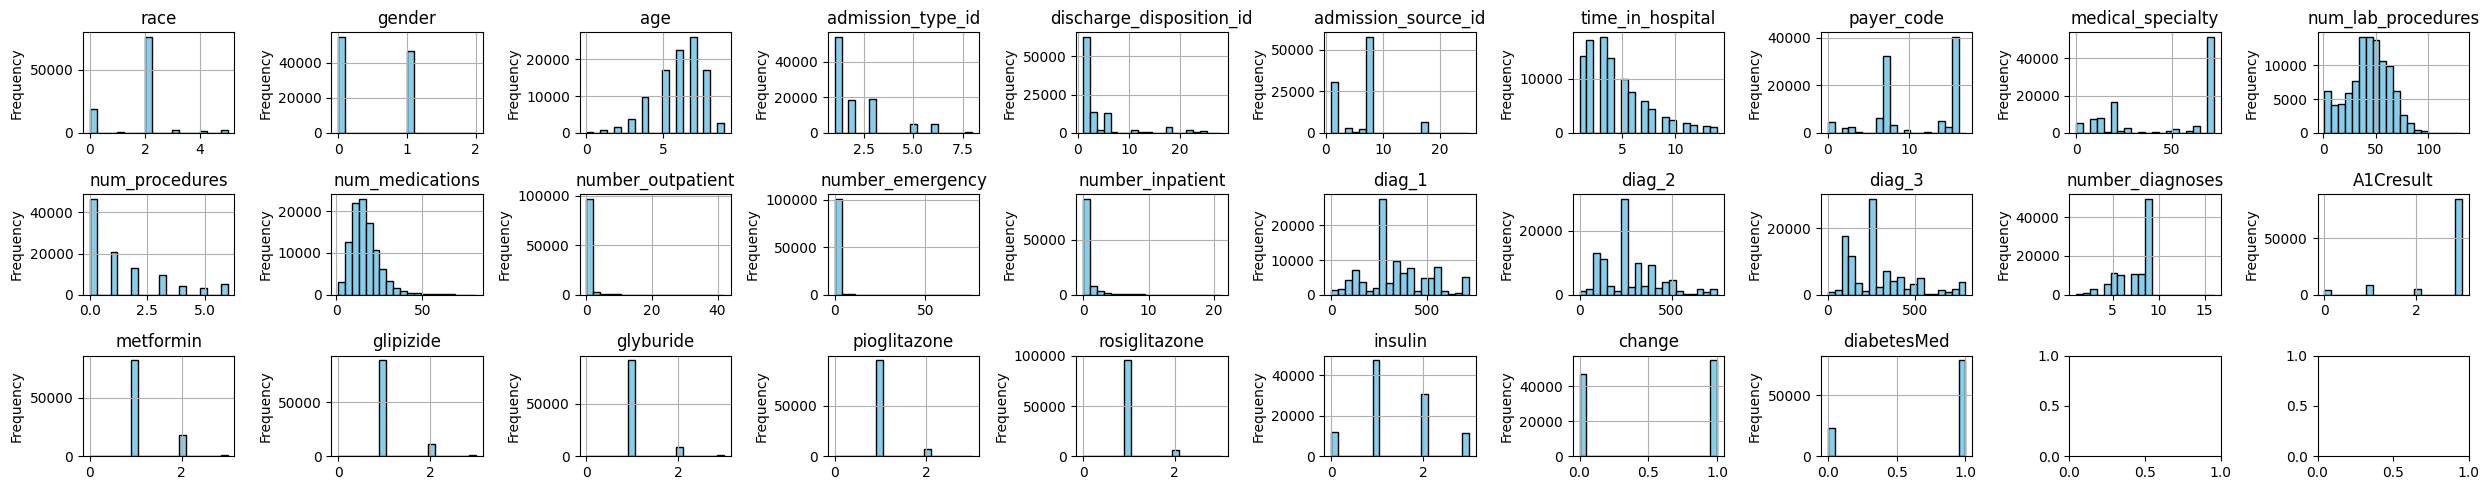

In [11]:
num_rows, num_cols = 3, 10
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5))

for i, column in enumerate(X.columns):
    ax = axes[i // num_cols, i % num_cols]
    X[column].plot(kind='hist', ax=ax, bins=20, edgecolor='black', color='skyblue')
    ax.set_title(column)
    ax.grid(True)

plt.tight_layout()
plt.show()

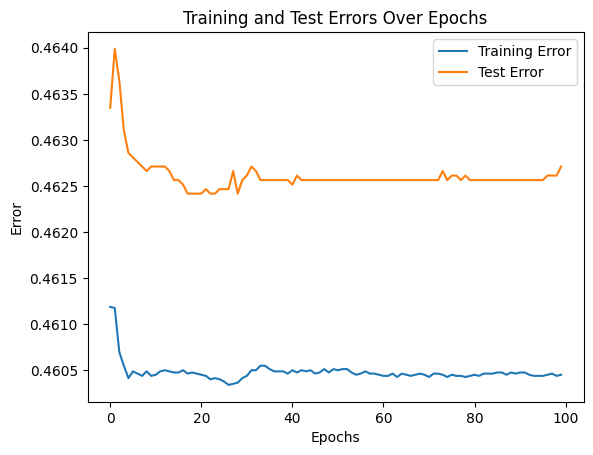

In [30]:
# from sklearn.neural_network import MLPClassifier
# import matplotlib.pyplot as plt


# Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=seed)


# mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
#                                    solver='sgd', learning_rate_init=0.001, batch_size=256,
#                                    random_state=seed)


# mlp_classifier.fit(Xtr, ytr)
# train_error = 1 - mlp_classifier.score(Xtr, ytr)
# test_error = 1 - mlp_classifier.score(Xte, yte)

# train_errors = [1 - acc for acc in history.loss_curve_]
# test_errors = [1 - acc for acc in mlp_classifier.score(Xte, yte)]

# # Plotting the errors over iterations/epochs
# plt.plot(train_error, label='Training Error')
# plt.plot(test_error, label='Test Error')
# plt.xlabel('Epochs')
# plt.ylabel('Error')
# plt.title('Training and Test Errors Over Epochs')
# plt.legend()
# plt.show()


import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Assuming X, y are your data
X, y = np.array(X), np.array(y)  # Ensure X, y are NumPy arrays

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=seed)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                               solver='sgd', learning_rate_init=0.001, batch_size=256,
                               random_state=seed)

# Training the model and collecting the training history
max_epochs = 100  # You can adjust this value
train_errors = []
test_errors = []

for epoch in range(max_epochs):
    mlp_classifier.partial_fit(Xtr, ytr, classes=np.unique(ytr))
    
    # Compute training error
    train_error = 1 - mlp_classifier.score(Xtr, ytr)
    train_errors.append(train_error)
    
    # Compute test error
    test_error = 1 - mlp_classifier.score(Xte, yte)
    test_errors.append(test_error)

# Plotting the errors over iterations/epochs
plt.plot(train_errors, label='Training Error')
plt.plot(test_errors, label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training and Test Errors Over Epochs')
plt.legend()
plt.show()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters:  {'activation': 'logistic', 'hidden_layer_sizes': (150,)}
Test Accuracy: 57.08%


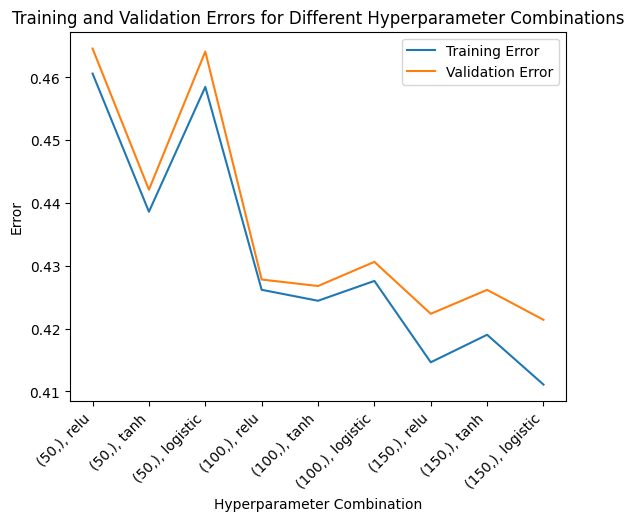

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

X, y = np.array(X), np.array(y)  # Ensure X, y are NumPy arrays

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],  # Vary the number of neurons in a single hidden layer
    'activation': ['relu', 'tanh', 'logistic'],  # Vary the activation function
}

mlp_classifier = MLPClassifier(solver='adam', learning_rate_init=0.001, batch_size=256, random_state=seed)

# Perform grid search
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=5, scoring='accuracy', verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

# Evaluate the model on the test set using the best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy: {:.2f}%".format(accuracy * 100))
train_errors = 1 - grid_search.cv_results_['mean_train_score']
test_errors = 1 - grid_search.cv_results_['mean_test_score']

plt.plot(train_errors, label='Training Error')
plt.plot(test_errors, label='Validation Error')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Error')
plt.title('Training and Validation Errors for Different Hyperparameter Combinations')
plt.xticks(ticks=np.arange(len(param_grid['hidden_layer_sizes']) * len(param_grid['activation'])),
           labels=[f"{layers}, {act}" for layers in param_grid['hidden_layer_sizes'] for act in param_grid['activation']],
           rotation=45, ha="right")
plt.legend()
plt.show()